## Adding SNe to CoCo
___

This notebook will go through adding a SN to the CoCo template framework.

In [77]:
%matplotlib inline
# %matplotlib notebook

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
from matplotlib import pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

import os
import numpy as np
from astropy.table import Table, Column
from collections import OrderedDict

import pycoco as pcc

## Download SN
---
The example that I will go through is probably the simplest one - from a JSON that I have downloaded from http://sne.space contaning the information for SN2010as.

In [2]:
import json

In [36]:
snname = "SN2010as"
path = "/Users/berto/data/CoreCollapse/SNe/SN2010as.json"

sndict = json.load(open(path, 'r'))[snname]

In [37]:
len(sndict["spectra"])

26

In [38]:
S1 = sndict["spectra"][0]

In [39]:
S1.keys()

dict_keys(['time', 'filename', 'instrument', 'observer', 'redshift', 'reducer', 'reduction', 'u_fluxes', 'u_time', 'u_wavelengths', 'data', 'source'])

In [40]:
w = np.array(S1["data"], dtype=np.float64).T[0]
f = np.array(S1["data"], dtype=np.float64).T[1]

In [41]:
f

array([  1.99488800e-16,   2.74730800e-16,   2.80291500e-16, ...,
         5.54147300e-16,   5.59090900e-16,   5.63390900e-16])

In [42]:
from astropy.table import Table, Column, Row
import astropy.units as u


In [43]:
wavelength = Column(w, name = ("wavelength"), unit=u.Angstrom)
flux = Column(f, name = ("flux"), unit=u.cgs.erg / u.si.cm ** 2 / u.si.s / u.angstrom)

In [44]:
Table([wavelength, flux])

wavelength,flux
Angstrom,erg / (Angstrom cm2 s)
float64,float64
3674.0,1.994888e-16
3675.92575,2.747308e-16
3677.851501,2.802915e-16
3679.777251,2.936676e-16
3681.703001,3.203338e-16
3683.628751,2.445988e-16
3685.554502,3.125971e-16
3687.480252,2.8318e-16


In [45]:
spec_dict_list = sndict["spectra"]
for s in spec_dict_list:
    print(s["time"], s["filename"])

55275.0 SN10as_100320_DUP_WF_b01.dat
55276.0 SN10as_100321_GEM_GM_r01.dat
55277.0 SN10as_100322_DUP_WF_b01.dat
55278.0 SN10as_100323_DUP_WF_b01.dat
55279.0 SN10as_100324_DUP_WF_b01.dat
55280.0 SN10as_100325_DUP_WF_b01.dat
55280.0 SN10as_100325_VLT_XS_nir.dat
55280.0 SN10as_100325_VLT_XS_uvb.dat
55280.0 SN10as_100325_VLT_XS_vis.dat
55281.0 SN10as_100326_VLT_XS_nir.dat
55281.0 SN10as_100326_VLT_XS_uvb.dat
55281.0 SN10as_100326_VLT_XS_vis.dat
55283.0 SN10as_100328_VLT_XS_nir.dat
55283.0 SN10as_100328_VLT_XS_uvb.dat
55283.0 SN10as_100328_VLT_XS_vis.dat
55284.0 SN10as_100329_VLT_XS_nir.dat
55284.0 SN10as_100329_VLT_XS_uvb.dat
55284.0 SN10as_100329_VLT_XS_vis.dat
55295.0 SN10as_100409_SOA_GO_g01.dat
55308.0 SN10as_100422_GEM_GM_c01.dat
55385.0 SN10as_100708_GEM_GM_c01.dat
55400.0 SN10as_100723_SOA_GO_g01.dat
55410.0 SN10as_100802_GEM_GM_c01.dat
55413.0 SN10as_100805_SOA_GO_g01.dat
55597.0 SN10as_110205_BAA_IM_b01.dat
55597.0 SN10as_110205_BAA_IM_r01.dat


In [46]:
print(len(spec_dict_list))

26


['SN10as_100325_VLT_XS_nir.dat', 'SN10as_100325_VLT_XS_uvb.dat', 'SN10as_100325_VLT_XS_vis.dat']
6 SN10as_100325_VLT_XS_nir.dat
7 SN10as_100325_VLT_XS_uvb.dat
8 SN10as_100325_VLT_XS_vis.dat


/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:56: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:57: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


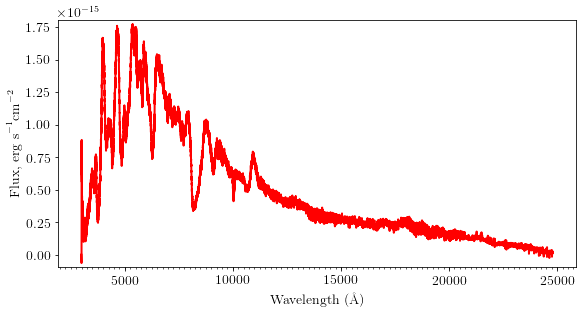

has data
['SN10as_100326_VLT_XS_nir.dat', 'SN10as_100326_VLT_XS_uvb.dat', 'SN10as_100326_VLT_XS_vis.dat']
9 SN10as_100326_VLT_XS_nir.dat
10 SN10as_100326_VLT_XS_uvb.dat
11 SN10as_100326_VLT_XS_vis.dat


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2010as/. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + path + ". Run with squash = True to overwrite")
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:56: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:57: VisibleDeprecationWarning: converting an array with ndim > 0 to an index

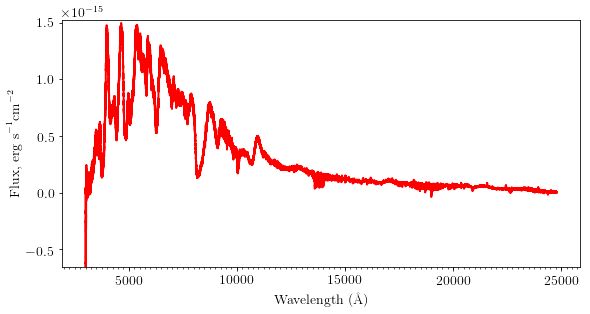

has data
['SN10as_100328_VLT_XS_nir.dat', 'SN10as_100328_VLT_XS_uvb.dat', 'SN10as_100328_VLT_XS_vis.dat']
12 SN10as_100328_VLT_XS_nir.dat
13 SN10as_100328_VLT_XS_uvb.dat
14 SN10as_100328_VLT_XS_vis.dat


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2010as/. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + path + ". Run with squash = True to overwrite")
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:56: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:57: VisibleDeprecationWarning: converting an array with ndim > 0 to an index

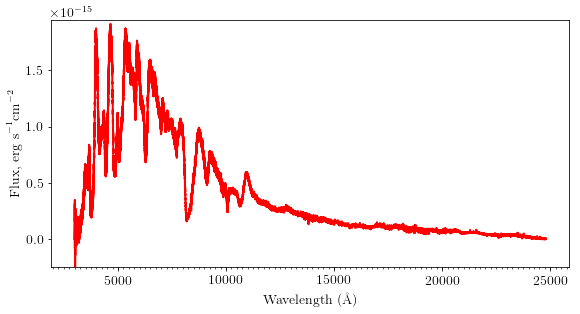

has data
['SN10as_100329_VLT_XS_nir.dat', 'SN10as_100329_VLT_XS_uvb.dat', 'SN10as_100329_VLT_XS_vis.dat']
15 SN10as_100329_VLT_XS_nir.dat
16 SN10as_100329_VLT_XS_uvb.dat
17 SN10as_100329_VLT_XS_vis.dat


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2010as/. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + path + ". Run with squash = True to overwrite")
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:56: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:57: VisibleDeprecationWarning: converting an array with ndim > 0 to an index

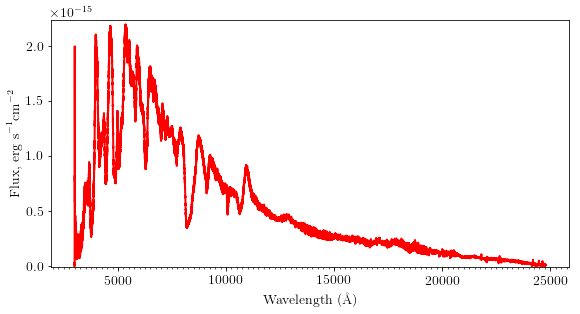

has data


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2010as/. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + path + ". Run with squash = True to overwrite")


In [79]:
to_combine = ["SN10as_100325_VLT_XS_", 
              "SN10as_100326_VLT_XS_", 
              "SN10as_100328_VLT_XS_", 
              "SN10as_100329_VLT_XS_"]

to_combine_phases = [55280.0,
                     55281.0,
                     55283.0,
                     55284.0]

spec_filenames = [spec["filename"] for spec in sndict["spectra"]]
# spec_filenames = [spec["filename"][:-7] for spec in sndict["spectra"]]
mask = np.ones(len(spec_dict_list), dtype=bool)

combined = np.array([])

for prefix in to_combine:
    matches = [f for f in spec_filenames if prefix in f]
    print(matches)
    
    spec_dir = "/Users/berto/data/CoreCollapse/data/spectra/SN2010as/"
    
    tables = []
    out_dict = OrderedDict()
    for file in matches:
        w = np.where(np.array(spec_filenames) == file)[0]
        
        wavl = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[0]
        flux = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[1]
        
        wavelength = Column(wavl, name = ("wavelength"), unit=u.Angstrom)
        flux = Column(flux, name = ("flux"), unit=u.cgs.erg / u.si.cm ** 2 / u.si.s / u.angstrom)
     
        tables.append(Table([wavelength, flux]))
        
        for i in w:
            print(i, spec_dict_list[i]["filename"])
            mask[i] = False
#             spec_dict_list.pop(i)
            
    tables = np.array(tables)[np.argsort([i["wavelength"][0] for i in tables])]
    
    S1 = pcc.SpectrumClass()
    S2 = pcc.SpectrumClass()
    S3 = pcc.SpectrumClass()
    
    S1.load_table(tables[0], path="")
    S2.load_table(tables[1], path="")
    S3.load_table(tables[2], path="")
    
    sr=pcc.functions.combine_spectra(S2, S3, 9975, 10150, scale=True)
    spec = pcc.functions.combine_spectra(S1,sr, 5502.5, 5525)
    filename = prefix+"combined.dat"
    
    out_dict["filename"] = os.path.join(spec_dir, filename)
    out_dict["time"] = spec_dict_list[w]["time"]
    out_dict["redshift"] = spec_dict_list[w]["redshift"]
    out_dict["snname"] = snname
    
    combined = np.append(combined, out_dict)
    
    spec.plot()
    spec.save(filename, path=spec_dir, format="ascii.commented_header", verbose=True)

In [80]:
out_dict

OrderedDict([('filename',
              '/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100329_VLT_XS_combined.dat'),
             ('time', '55284.0'),
             ('redshift', '0.007315'),
             ('snname', 'SN2010as')])

SN10as_100320_DUP_WF_b01.dat
[0]
has data
55275.0


/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2010as/. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + path + ". Run with squash = True to overwrite")
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/berto/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:25: VisibleDeprecationWarning: converting an array with ndim > 0 to an index 

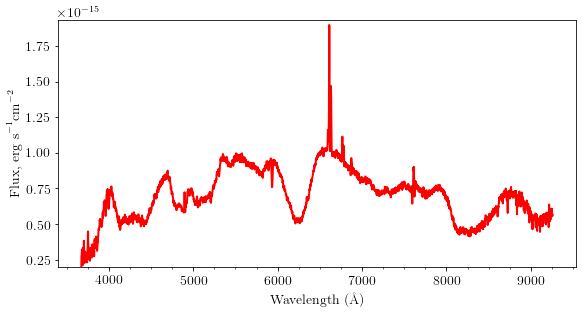

SN10as_100321_GEM_GM_r01.dat
[1]
has data
55276.0


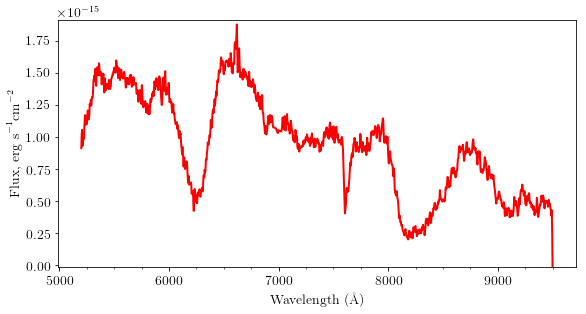

SN10as_100322_DUP_WF_b01.dat
[2]
has data
55277.0


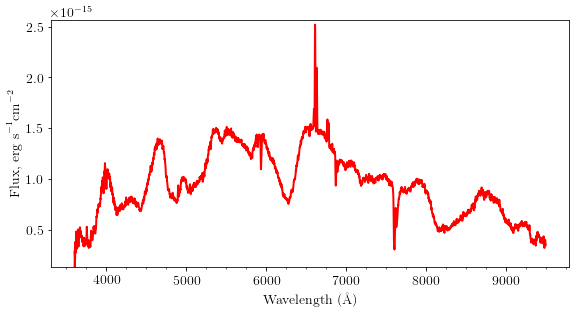

SN10as_100323_DUP_WF_b01.dat
[3]
has data
55278.0


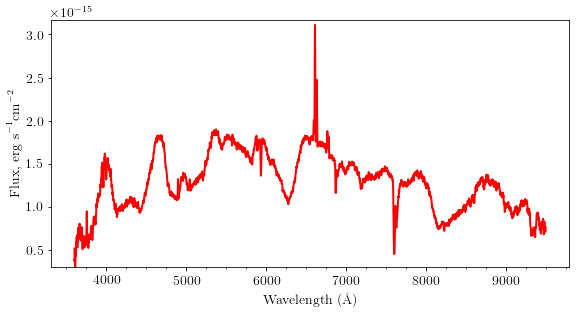

SN10as_100324_DUP_WF_b01.dat
[4]
has data
55279.0


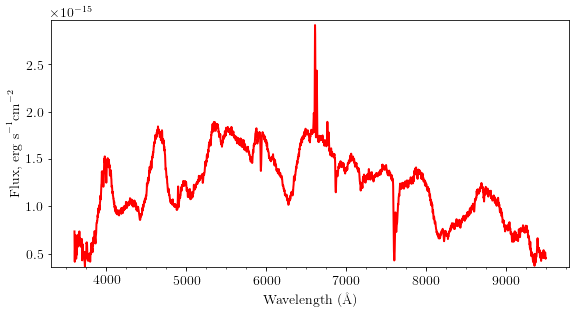

SN10as_100325_DUP_WF_b01.dat
[5]
has data
55280.0


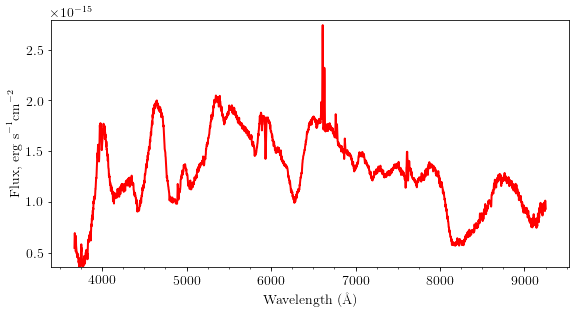

SN10as_100409_SOA_GO_g01.dat
[18]
has data
55295.0


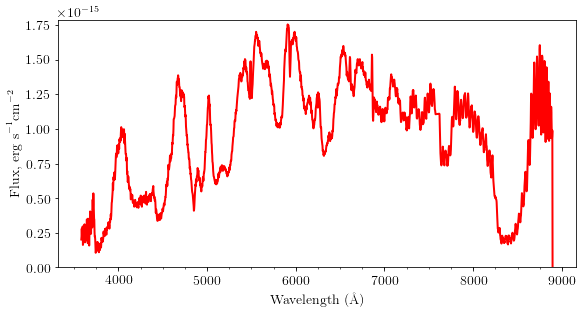

SN10as_100422_GEM_GM_c01.dat
[19]
has data
55308.0


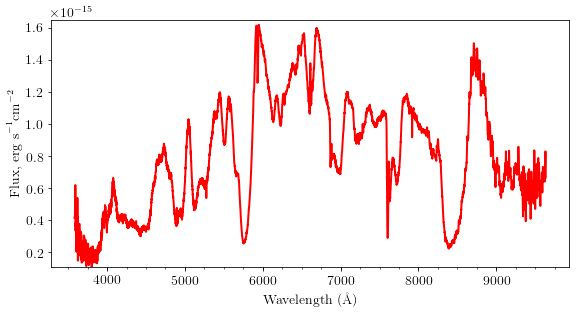

SN10as_100708_GEM_GM_c01.dat
[20]
has data
55385.0


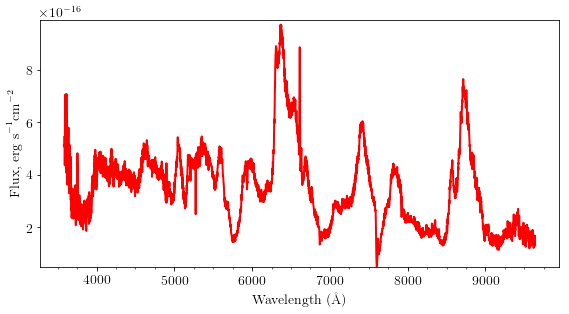

SN10as_100723_SOA_GO_g01.dat
[21]
has data
55400.0


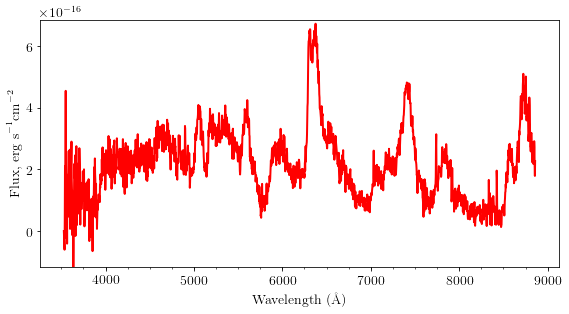

SN10as_100802_GEM_GM_c01.dat
[22]
has data
55410.0


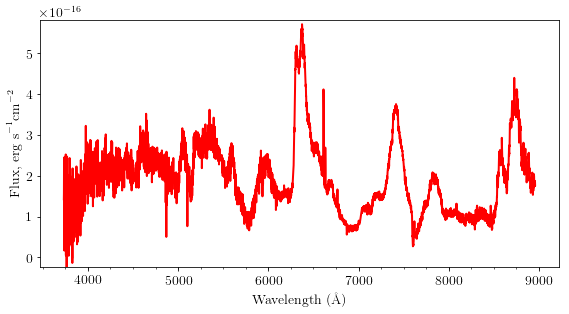

SN10as_100805_SOA_GO_g01.dat
[23]
has data
55413.0


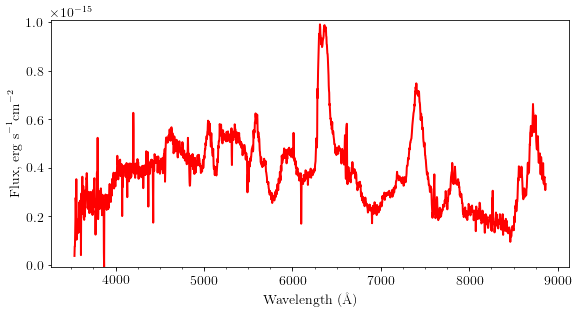

SN10as_110205_BAA_IM_b01.dat
[24]
has data
55597.0


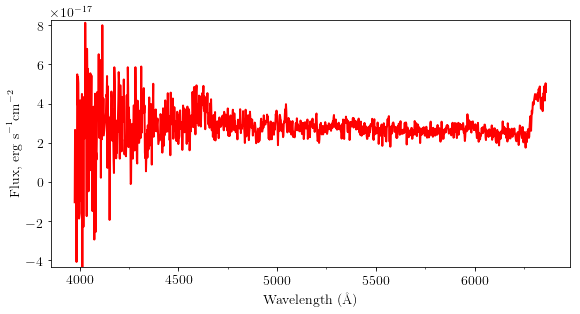

SN10as_110205_BAA_IM_r01.dat
[25]
has data
55597.0


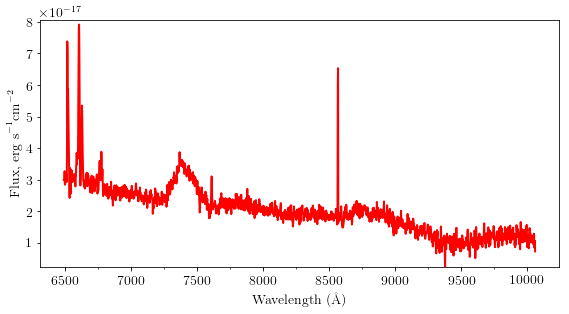

In [86]:
uncombined=np.array([])

for spec_file in np.array(spec_filenames)[mask]:
    print(spec_file)
    
    w = np.where(np.array(spec_filenames) == spec_file)[0]
    print(w)
    
    wavl = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[0]
    flux = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[1]

    wavelength = Column(wavl, name = ("wavelength"), unit=u.Angstrom)
    flux = Column(flux, name = ("flux"), unit=u.cgs.erg / u.si.cm ** 2 / u.si.s / u.angstrom)

    spec_table = Table([wavelength, flux])

    s = pcc.SpectrumClass()

    s.load_table(spec_table, path="")

    s.save(spec_file, path=spec_dir)
    out_dict = OrderedDict()
    out_dict["filename"] = os.path.join(spec_dir, spec_file)
    out_dict["time"] = spec_dict_list[w]["time"]
    out_dict["redshift"] = spec_dict_list[w]["redshift"]
    out_dict["snname"] = snname
    print(spec_dict_list[w]["time"])
    uncombined = np.append(uncombined, out_dict)
    
    s.plot()

In [87]:
out_array = np.append(combined, uncombined)

In [88]:
out_array

array([ OrderedDict([('filename', '/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100325_VLT_XS_combined.dat'), ('time', '55280.0'), ('redshift', '0.007315'), ('snname', 'SN2010as')]),
       OrderedDict([('filename', '/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100326_VLT_XS_combined.dat'), ('time', '55281.0'), ('redshift', '0.007315'), ('snname', 'SN2010as')]),
       OrderedDict([('filename', '/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100328_VLT_XS_combined.dat'), ('time', '55283.0'), ('redshift', '0.007315'), ('snname', 'SN2010as')]),
       OrderedDict([('filename', '/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_110205_BAA_IM_r01.dat'), ('time', '55597.0'), ('redshift', '0.007315'), ('snname', 'SN2010as')]),
       OrderedDict([('filename', '/Users/berto/data/CoreCollapse/data/spectra/SN2010as/SN10as_100320_DUP_WF_b01.dat'), ('time', '55275.0'), ('redshift', '0.007315'), ('snname', 'SN2010as')]),
       OrderedDict([('fi

We need a (rough) estimate of the time of maximum light (only to ensure the spectra adhere to our naming convention), so from Folatelli et al. 2014 (http://iopscience.iop.org/article/10.1088/0004-637X/792/1/7/pdf) we have:

In [ ]:
mjdmax = 55286.4

In [ ]:
phase_list

In [ ]:
list_file_path = "/Users/berto/data/CoreCollapse/SNe/SN2010as.list"
outdir = "/Users/berto/data/CoreCollapse/data/spectra/SN2010as/"

max_phase = 50.

spec_path_out_list = []
snname_list = []
mjd_list = []
z_list = []

for i, s in enumerate(sndict["spectra"]):
    
    w = np.array(s["data"], dtype=np.float64).T[0]
    f = np.array(s["data"], dtype=np.float64).T[1]
    
    wavelength = Column(w, name = ("wavelength"), unit=u.Angstrom)
    flux = Column(f, name = ("flux"), unit=u.cgs.erg / u.si.cm ** 2 / u.si.s / u.angstrom)
    
    spec_table = Table([wavelength, flux])
    
    S = pcc.SpectrumClass()
    
    spec_file = s["filename"]
    
    S.load_table(spec_table, path=spec_file)
    #S.plot()
    newname = snname+"_"+str(round(phase_list[i], 2))+".txt"
    

    if phase_list[i] < max_phase:
        spec_path_out_list.append(os.path.join(outdir, newname))
        snname_list.append(snname)
        mjd_list.append(s["time"])
        z_list.append(s["redshift"])
        print(os.path.join(outdir, newname))
        S.save(filename=newname, path=outdir, format="ascii.commented_header",verbose=True)
        
        print(newname, snname, s["time"], s["redshift"])
        

list_table = Table([spec_path_out_list, snname_list, mjd_list, z_list])
list_table.write(filename=list_file_path, format="ascii.fast_no_header")  

In [ ]:
list_table

In [ ]:
info = pcc.InfoClass()
info.load()

In [ ]:
info._data

In [ ]:
small_table = info._data[("snname", "z_obs", "mu", "RA", "Dec", "Type", "z_distmod")]

In [ ]:
small_table

In [ ]:
sndict.keys()

In [ ]:
sndict["lumdist"]

In [ ]:
from astropy.cosmology import LambdaCDM
from astropy.coordinates import Distance

mu = 32.16 ## from NED -- https://ned.ipac.caltech.edu/ui/?q=objsearch&omegav=0.73&obj_sort=RA%20or%20Longitude&omegam=0.27&extend=no&hconst=73&out_csys=Equatorial&of=pre_text&img_stamp=YES&list_limit=5&out_equinox=J2000.0&corr_z=1&objname=NGC%206000

d = Distance(distmod=mu)

z_distmod = d.z

In [ ]:
(snname, sndict["redshift"][0]["value"], mu, sndict["ra"][0]["value"], sndict["dec"][0]["value"], sndict["claimedtype"][0]["value"].replace("/", ""), z_distmod)

In [ ]:
small_table.add_row((snname, sndict["redshift"][0]["value"], mu, sndict["ra"][0]["value"], sndict["dec"][0]["value"], sndict["claimedtype"][0]["value"].replace("/", ""), z_distmod))

In [ ]:
small_table

In [ ]:
outfile = pcc._default_info_path.replace(".dat", "_new.dat")
small_table.write(outfile, format="ascii.commented_header")


In [ ]:
SN = pcc.SNClass(snname)
SN.load_phot()
SN.plot_lc()

In [ ]:
# list_path = "/Users/berto/Code/CoCo/lists/"+snname+".list"
list_file_path = "/Users/berto/data/CoreCollapse/SNe/SN2010as.list"
SN.load_list(path=list_file_path)

In [ ]:
SN.load_spec()

In [ ]:
SN.plot_spec()

In [ ]:
fit_path = "/Users/berto/Code/CoCo/recon/"+snname+".dat"
SN.get_lcfit(fit_path)

SN.plot_lc()

In [ ]:
pcc.run_specfit(list_file_path)